<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-05-12-KNN/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly import data

In [89]:
iris = data.iris()
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
23,5.1,3.3,1.7,0.5,setosa,1
22,4.6,3.6,1.0,0.2,setosa,1
17,5.1,3.5,1.4,0.3,setosa,1
30,4.8,3.1,1.6,0.2,setosa,1
149,5.9,3.0,5.1,1.8,virginica,3


In [104]:
X = iris.drop(columns=['species', 'species_id', 'sepal_length',	'sepal_width'	])
Y = iris['species_id']

In [91]:
X.sample(3)

,petal_length,petal_width
104,5.8,2.2
103,5.6,1.8
67,4.1,1.0


In [108]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=20)

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [94]:
from sklearn.metrics import accuracy_score

pred = knn.predict(xtest)
score = accuracy_score(ytest, pred)
print(score)

0.9210526315789473


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


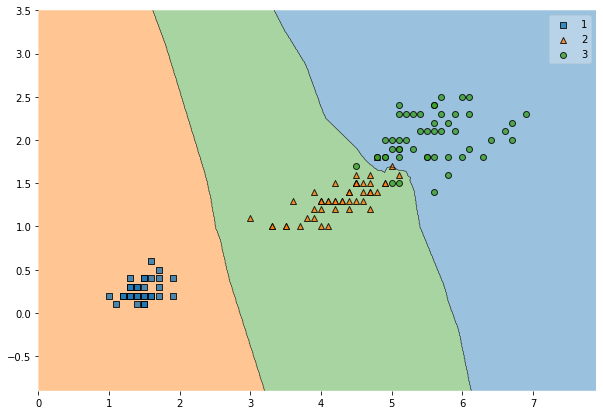

In [95]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 7))
plot_decision_regions(X.values, Y.values, clf = knn)

In [96]:
X = iris.drop(columns=['species', 'species_id',])
Y = iris['species_id']

In [105]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [1, 3, 5, 7, 9], 'metric': ['euclidean', 'chebyshev',], 'weights': ['uniform', 'distance']}

        
model = KNeighborsClassifier(n_jobs=-1)

gscv = GridSearchCV(model, params, scoring = 'accuracy', cv = 3, n_jobs=-1)
gscv.fit(X, Y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [106]:
gscv.best_params_

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

In [107]:
params = gscv.cv_results_['params']
scores = gscv.cv_results_['mean_test_score']

for res in zip(params, scores):
  print(res[0], -res[1])

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'} -0.9666666666666667
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'} -0.9666666666666667
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'} -0.9666666666666667
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'} -0.96
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'} -0.9666666666666667
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'} -0.96
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'} -0.96
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'} -0.9533333333333333
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'} -0.96
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'} -0.9533333333333333
{'metric': 'chebyshev', 'n_neighbors': 1, 'weights': 'uniform'} -0.9666666666666667
{'metric': 'chebyshev', 'n_neighbors': 1, 'weights': 'distance'} -0.9666666666666667
{'metric': 'chebyshev', 'n_neighbors': 3, 

In [100]:
class KNN():
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, Y):
        self.x_train = X
        self.y_train = Y

    def distance(self, a, b):
        return np.sqrt(((a-b)**2).sum())

    def label(self, xq):
        # distance
        # k nearest
        # majority Vote

        dist = np.zeros(self.x_train.shape[0]) # x_train y_train

        for i, xt in enumerate(self.x_train.values):
            dist[i] = self.distance(xt, xq)
        
        idx = dist.argsort()
        idx = idx[:self.k]
        lab = self.y_train.iloc[idx]
        labels, counts = np.unique(lab, return_counts=True)
        return labels[counts.argmax()]

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.y_train.iloc[0])

        for i, x in enumerate(X.values):
            y_pred[i] = self.label(x)

        return y_pred

In [101]:
model = KNN(5)

model.fit(xtrain, ytrain)

In [102]:
pred = model.predict(xtest)

In [103]:
score = accuracy_score(ytest, pred)
print(score)

0.9210526315789473
